### Forecasting future sales for Rossmann Pharmaceuticals across various stores

In [29]:
import os,sys
# os.chdir('..')
import warnings
warnings.filterwarnings('ignore')
import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [30]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

In [31]:
import os
print(os.getcwd())


d:\pro\10 acadamy\rossmann-sales-predictions\notebooks


In [32]:
# df = pd.read_csv("../data/train.csv")

#### Load train, test and store dataset for EDA analysis

In [33]:
from scripts.data_loder import load_data

In [34]:
train_data_path = '../data/train.csv'
test_data_path ='../data/test.csv'
store_data_path ='../data/store.csv'

In [35]:
train_data, test_data, store_data = load_data(train_data_path,test_data_path,store_data_path)

2025-01-03 08:18:22,851 - INFO - Loading data from file...
2025-01-03 08:18:22,851 - INFO - Loading data from file...
2025-01-03 08:18:23,319 - INFO - Train Data, Test Data and Store Data loaded with shape (1017209, 9), (41088, 8), and (1115, 10) respectively
2025-01-03 08:18:23,319 - INFO - Train Data, Test Data and Store Data loaded with shape (1017209, 9), (41088, 8), and (1115, 10) respectively


#### Verify the loaded datasets


##### Train Dataset

In [36]:
train_data.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [37]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [38]:
test_data.head(10)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
5,6,10,4,2015-09-17,1.0,1,0,0
6,7,11,4,2015-09-17,1.0,1,0,0
7,8,12,4,2015-09-17,1.0,1,0,0
8,9,13,4,2015-09-17,1.0,1,0,0
9,10,14,4,2015-09-17,1.0,1,0,0


In [39]:
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


#### Store Dataset


In [40]:
store_data.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [41]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Cleaning the data

##### Exploratory Data Analysis (EDA)

###### Check missing value

In [42]:
from scripts.preprocessing import find_missing_values

#### Find missing values of Train Dataset


In [43]:
find_missing_values(train_data)

2025-01-03 08:18:23,514 - INFO - Finding missing values in DataFrame...
2025-01-03 08:18:23,514 - INFO - Finding missing values in DataFrame...


From 9 columns selected, there are 0 columns with missing values.


,Missing values,Percent of Total Values,DataType


#### Find Missing Values of Test Dataset


In [44]:
find_missing_values(test_data)

2025-01-03 08:18:23,594 - INFO - Finding missing values in DataFrame...
2025-01-03 08:18:23,594 - INFO - Finding missing values in DataFrame...


From 8 columns selected, there are 1 columns with missing values.


,Missing values,Percent of Total Values,DataType
Open,11,0.0,float64


#### Find Missing Values of Store Dataset


In [45]:
find_missing_values(store_data)

2025-01-03 08:18:23,611 - INFO - Finding missing values in DataFrame...
2025-01-03 08:18:23,611 - INFO - Finding missing values in DataFrame...


From 10 columns selected, there are 6 columns with missing values.


,Missing values,Percent of Total Values,DataType
Promo2SinceYear,544,48.8,float64
Promo2SinceWeek,544,48.8,float64
PromoInterval,544,48.8,object
CompetitionOpenSinceMonth,354,31.7,float64
CompetitionOpenSinceYear,354,31.7,float64
CompetitionDistance,3,0.3,float64


#### Handling missing values


In [46]:
from scripts.preprocessing import replace_missing_values

##### Our Training Data has no missing value and Test Data has one missing value

In [47]:
test_data=replace_missing_values(test_data)

2025-01-03 08:18:23,639 - INFO - Replacing missing values...
2025-01-03 08:18:23,639 - INFO - Replacing missing values...
2025-01-03 08:18:23,645 - INFO - Replacing missing values in column 'Id' with mean: 41088
2025-01-03 08:18:23,645 - INFO - Replacing missing values in column 'Id' with mean: 41088
2025-01-03 08:18:23,648 - INFO - Replacing missing values in column 'Store' with mean: 1115
2025-01-03 08:18:23,648 - INFO - Replacing missing values in column 'Store' with mean: 1115
2025-01-03 08:18:23,650 - INFO - Replacing missing values in column 'DayOfWeek' with mean: 7
2025-01-03 08:18:23,650 - INFO - Replacing missing values in column 'DayOfWeek' with mean: 7
2025-01-03 08:18:23,654 - INFO - Replacing missing values in column 'Open' with mean: 1.0
2025-01-03 08:18:23,654 - INFO - Replacing missing values in column 'Open' with mean: 1.0
2025-01-03 08:18:23,655 - INFO - Replacing missing values in column 'Promo' with mean: 1
2025-01-03 08:18:23,655 - INFO - Replacing missing values i

finding again missing values for Test data

In [48]:
find_missing_values(test_data)

2025-01-03 08:18:23,677 - INFO - Finding missing values in DataFrame...
2025-01-03 08:18:23,677 - INFO - Finding missing values in DataFrame...


From 8 columns selected, there are 0 columns with missing values.


,Missing values,Percent of Total Values,DataType


In [49]:
store_data=replace_missing_values(store_data)

2025-01-03 08:18:23,717 - INFO - Replacing missing values...
2025-01-03 08:18:23,717 - INFO - Replacing missing values...
2025-01-03 08:18:23,717 - INFO - Replacing missing values in column 'Store' with mean: 1115
2025-01-03 08:18:23,717 - INFO - Replacing missing values in column 'Store' with mean: 1115
2025-01-03 08:18:23,722 - INFO - Replacing missing values in column 'CompetitionDistance' with mean: 75860.0
2025-01-03 08:18:23,722 - INFO - Replacing missing values in column 'CompetitionDistance' with mean: 75860.0
2025-01-03 08:18:23,724 - INFO - Replacing missing values in column 'CompetitionOpenSinceMonth' with mean: 12.0
2025-01-03 08:18:23,724 - INFO - Replacing missing values in column 'CompetitionOpenSinceMonth' with mean: 12.0
2025-01-03 08:18:23,726 - INFO - Replacing missing values in column 'CompetitionOpenSinceYear' with mean: 2015.0
2025-01-03 08:18:23,726 - INFO - Replacing missing values in column 'CompetitionOpenSinceYear' with mean: 2015.0
2025-01-03 08:18:23,729 - 

In [50]:
find_missing_values(store_data)

2025-01-03 08:18:23,752 - INFO - Finding missing values in DataFrame...
2025-01-03 08:18:23,752 - INFO - Finding missing values in DataFrame...


From 10 columns selected, there are 0 columns with missing values.


,Missing values,Percent of Total Values,DataType


In [51]:
store_data.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"
4,5,a,a,29910.0,4.0,2015.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"
5,6,a,a,310.0,12.0,2013.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"
6,7,a,c,24000.0,4.0,2013.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"
7,8,a,a,7520.0,10.0,2014.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"
8,9,a,c,2030.0,8.0,2000.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"
9,10,a,a,3160.0,9.0,2009.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"


#### Check Outlier


In [52]:
from scripts.preprocessing import get_outlier_summary

In [53]:
get_outlier_summary(train_data,['Sales','Customers'])

2025-01-03 08:18:23,799 - INFO - Calculating outlier summary for numerical columns...
2025-01-03 08:18:23,799 - INFO - Calculating outlier summary for numerical columns...


From 9 selected numerical columns, there are 2 columns with outlier values.


,Variable,Number of Outliers
0,Sales,26694
1,Customers,38095


#### Plot outliers detected in the training data.

2025-01-03 08:18:23,876 - INFO - Creating box plots for outlier detection...
2025-01-03 08:18:23,876 - INFO - Creating box plots for outlier detection...


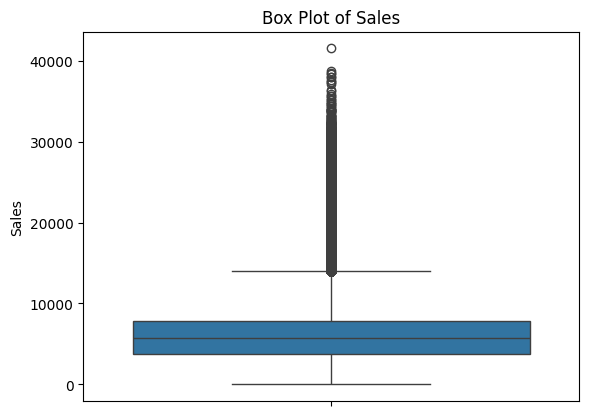

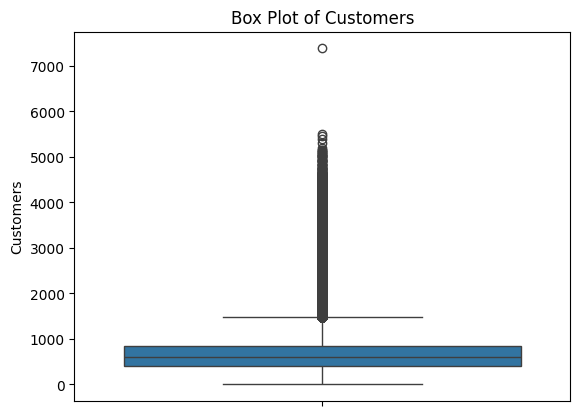

In [54]:
from scripts.preprocessing import boxPlotForDetectOutliers
boxPlotForDetectOutliers(train_data,['Sales','Customers'])

#### Detect outlier for Test Data

In [55]:
get_outlier_summary(test_data,['Id','Store','DayOfWeek'])

2025-01-03 08:18:26,459 - INFO - Calculating outlier summary for numerical columns...
2025-01-03 08:18:26,459 - INFO - Calculating outlier summary for numerical columns...


From 8 selected numerical columns, there are 0 columns with outlier values.


,Variable,Number of Outliers
0,Id,0
1,Store,0
2,DayOfWeek,0


#### Detect outlier for Store data

In [56]:
get_outlier_summary(store_data,['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear'])

2025-01-03 08:18:26,482 - INFO - Calculating outlier summary for numerical columns...
2025-01-03 08:18:26,482 - INFO - Calculating outlier summary for numerical columns...


From 10 selected numerical columns, there are 2 columns with outlier values.


,Variable,Number of Outliers
0,CompetitionDistance,110
1,CompetitionOpenSinceMonth,0
2,CompetitionOpenSinceYear,11
3,Promo2SinceWeek,0
4,Promo2SinceYear,0


#### Plot outliers detected in the store data.

2025-01-03 08:19:26,242 - INFO - Creating box plots for outlier detection...
2025-01-03 08:19:26,242 - INFO - Creating box plots for outlier detection...


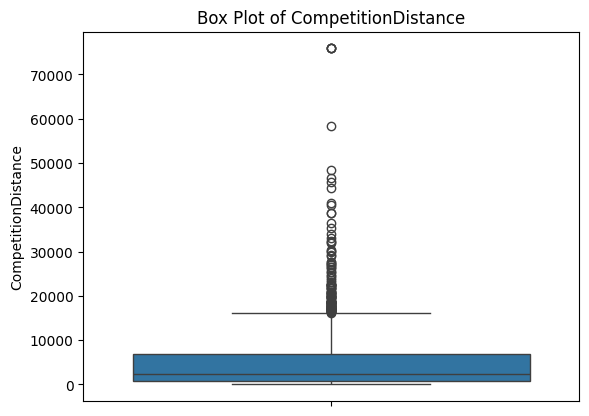

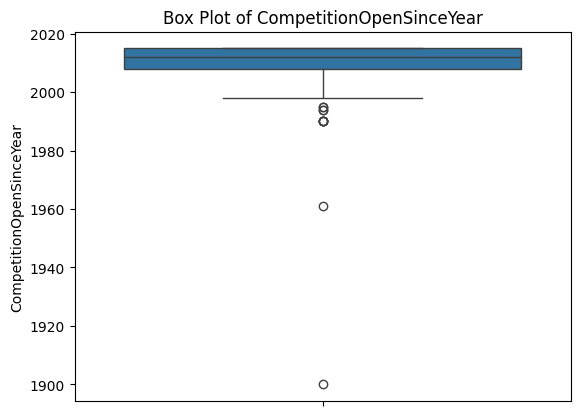

In [57]:
from scripts.preprocessing import boxPlotForDetectOutliers
boxPlotForDetectOutliers(store_data,['CompetitionDistance','CompetitionOpenSinceYear'])

#### Remove Outliers

In [58]:
from scripts.preprocessing import remove_outliers_winsorization

In [59]:
train_data = remove_outliers_winsorization(train_data,['Sales','Customers'])

2025-01-03 08:20:12,590 - INFO - Removing outliers using winsorization...
2025-01-03 08:20:12,590 - INFO - Removing outliers using winsorization...
2025-01-03 08:20:12,615 - INFO - Winsorizing column 'Sales' with lower bound: -2466.5 and upper bound: 14049.5
2025-01-03 08:20:12,615 - INFO - Winsorizing column 'Sales' with lower bound: -2466.5 and upper bound: 14049.5
2025-01-03 08:20:12,705 - INFO - Winsorizing column 'Customers' with lower bound: -243.0 and upper bound: 1485.0
2025-01-03 08:20:12,705 - INFO - Winsorizing column 'Customers' with lower bound: -243.0 and upper bound: 1485.0


In [60]:
store_data = remove_outliers_winsorization(store_data,['CompetitionDistance','CompetitionOpenSinceYear'])

2025-01-03 08:21:12,184 - INFO - Removing outliers using winsorization...
2025-01-03 08:21:12,184 - INFO - Removing outliers using winsorization...
2025-01-03 08:21:12,188 - INFO - Winsorizing column 'CompetitionDistance' with lower bound: -8557.5 and upper bound: 16182.5
2025-01-03 08:21:12,188 - INFO - Winsorizing column 'CompetitionDistance' with lower bound: -8557.5 and upper bound: 16182.5
2025-01-03 08:21:12,191 - INFO - Winsorizing column 'CompetitionOpenSinceYear' with lower bound: 1997.5 and upper bound: 2025.5
2025-01-03 08:21:12,191 - INFO - Winsorizing column 'CompetitionOpenSinceYear' with lower bound: 1997.5 and upper bound: 2025.5


#### Verify if outliers were removed


In [61]:
get_outlier_summary(train_data,['Sales','Customers'])

2025-01-03 08:22:25,371 - INFO - Calculating outlier summary for numerical columns...
2025-01-03 08:22:25,371 - INFO - Calculating outlier summary for numerical columns...


From 9 selected numerical columns, there are 0 columns with outlier values.


,Variable,Number of Outliers
0,Sales,0
1,Customers,0


In [62]:
get_outlier_summary(test_data,['Id','Store','DayOfWeek'])

2025-01-03 08:22:33,752 - INFO - Calculating outlier summary for numerical columns...
2025-01-03 08:22:33,752 - INFO - Calculating outlier summary for numerical columns...


From 8 selected numerical columns, there are 0 columns with outlier values.


,Variable,Number of Outliers
0,Id,0
1,Store,0
2,DayOfWeek,0


In [63]:
get_outlier_summary(store_data,['CompetitionDistance','CompetitionOpenSinceYear'])


2025-01-03 08:22:43,667 - INFO - Calculating outlier summary for numerical columns...
2025-01-03 08:22:43,667 - INFO - Calculating outlier summary for numerical columns...


From 10 selected numerical columns, there are 0 columns with outlier values.


,Variable,Number of Outliers
0,CompetitionDistance,0
1,CompetitionOpenSinceYear,0


#### Box-Plot After Removing Outlier

##### For training data

2025-01-03 08:24:01,848 - INFO - Creating box plots for outlier detection...
2025-01-03 08:24:01,848 - INFO - Creating box plots for outlier detection...


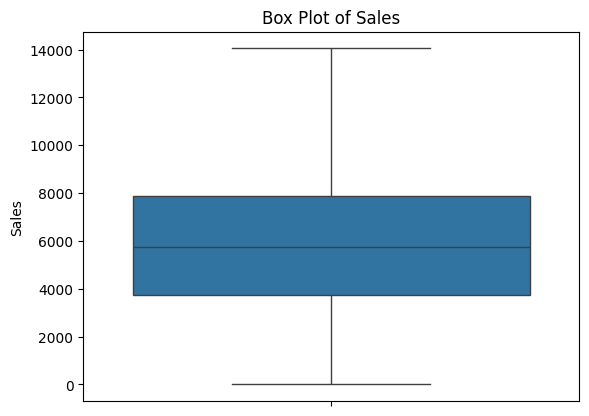

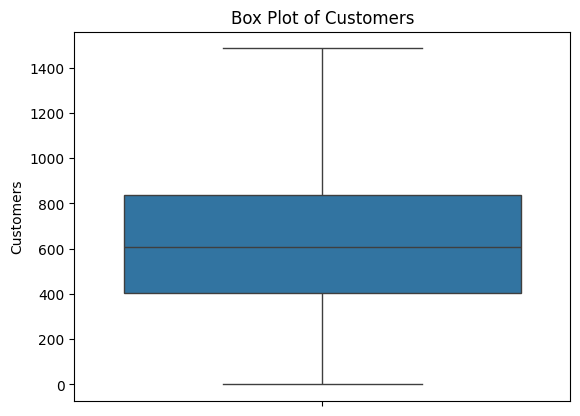

In [64]:
from scripts.preprocessing import boxPlotForDetectOutliers
boxPlotForDetectOutliers(train_data,['Sales','Customers'])

##### For Store Data

2025-01-03 08:25:41,867 - INFO - Creating box plots for outlier detection...
2025-01-03 08:25:41,867 - INFO - Creating box plots for outlier detection...


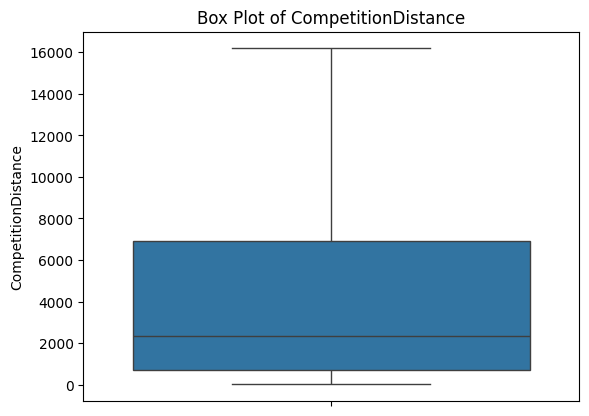

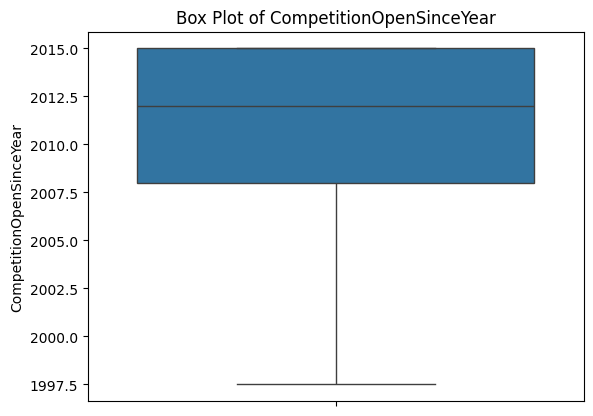

In [65]:
from scripts.preprocessing import boxPlotForDetectOutliers
boxPlotForDetectOutliers(store_data,['CompetitionDistance','CompetitionOpenSinceYear'])

##### Merge Training And Test With Store Dataset

In [66]:
merged_train_data_store = pd.merge(train_data, store_data, on='Store', how='inner')
merged_test_data_store = pd.merge(test_data, store_data, on='Store', how='inner')

In [67]:
merged_train_data_store.to_csv("../data/merged_train_data_store.csv", index=False)
merged_test_data_store.to_csv("../data/merged_test_data_store.csv", index=False)